<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Clust_GMM_EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# импорт
import numpy as np
from scipy.stats import multivariate_normal as mvn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
%matplotlib inline

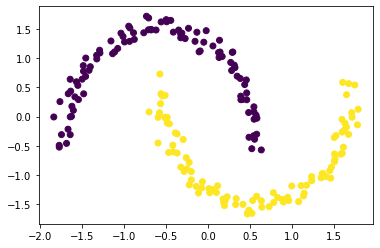

In [2]:
# данные - луны
x, y = datasets.make_moons(n_samples=200,
                           noise=0.05,
                           random_state=42)
# сразу стандартизация
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
# печать
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)
plt.show();

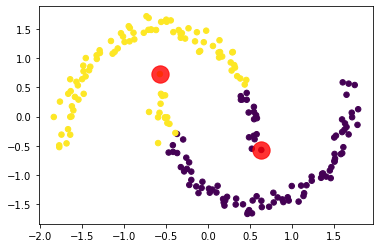

In [11]:
# обучение для 2 кластеров
n_clusters = 2
# создание экземпляра класса
GM_2 = GaussianMixture(n_components=n_clusters, # ожидаем 2 кластера
                      covariance_type='full')   # произвольная форма кластера
# обучение модели для 2 кластеров
cluster = GM_2.fit(x_std)
# точные метки кластеров
pred_GM_2 = cluster.predict(x_std)
# вероятности отнесения к кластерам
prob_GM_2 = cluster.predict_proba(x_std)
# матрица для координат центров
centers = np.zeros((n_clusters,
                    x_std.shape[1]))           
# печать
for i in range(n_clusters):
    density = mvn(cov=cluster.covariances_[i],
                  mean=cluster.means_[i]).logpdf(x_std)
    centers[i, :] = x_std[np.argmax(density)]

plt.scatter(x_std[:, 0], x_std[:, 1],c=pred_GM_2 ,s=30, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=300, alpha=0.8);

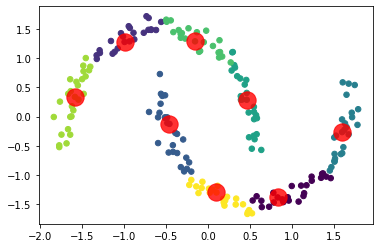

In [23]:
# обучение для 8 кластеров
n_clusters = 8
# создание экземпляра класса
GM_8 = GaussianMixture(n_components=n_clusters, # ожидаем 2 кластера
                      covariance_type='full')   # произвольная форма кластера
# обучение модели для 2 кластеров
cluster = GM_8.fit(x_std)
# точные метки кластеров
pred_GM_8 = cluster.predict(x_std)
# вероятности отнесения к кластерам
prob_GM_8 = cluster.predict_proba(x_std)
# матрица для координат центров
centers = np.zeros((n_clusters,
                    x_std.shape[1]))           
# печать
for i in range(n_clusters):
    density = mvn(cov=cluster.covariances_[i],
                  mean=cluster.means_[i]).logpdf(x_std)
    centers[i, :] = x_std[np.argmax(density)]

plt.scatter(x_std[:, 0], x_std[:, 1],c=pred_GM_8 ,s=30, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=300, alpha=0.8);

Как видно 8 кластеров дали гораздо лучшее покрытие

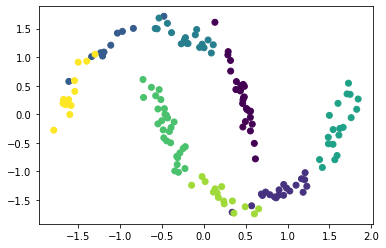

In [56]:
# использование GMM для генерации новых данных с распределением, 
# подобным распределению обучающих данных
GM_8 = GaussianMixture(n_components=8,
                       covariance_type='full') 
GM_8_cluster = GM_8.fit(x_std)
GM_8_generator = GM_8_cluster.sample(n_samples=150)
# генератор вернет список списков!
plt.scatter(GM_8_generator[0][:, 0], GM_8_generator[0][:, 1], c=GM_8_generator[1])
#plt.scatter(x_std[:, 0], x_std[:, 1], c=y)
plt.show();

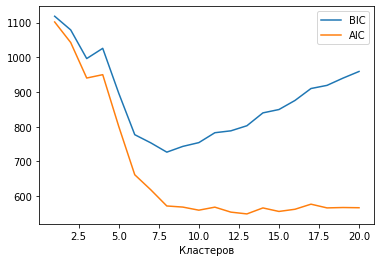

In [63]:
# оценка алгоритма (но только в качестве моделирования плотности, а не кластеризации)
# набор значений кол-ва кластеров
n_clusters = np.arange(1, 21)
# заготовка для обучения моделей в цикле через list compr
models = [GaussianMixture(cluster, 
                          covariance_type='full', 
                          random_state=42).fit(x_std)
          for cluster in n_clusters]
# печать + обучение моделей
# расчет байесовского информационного критерия
plt.plot(n_clusters, [model.bic(x_std) for model in models], label='BIC')
# расчет и вывод информационного критерия Акаике
plt.plot(n_clusters, [model.aic(x_std) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Кластеров');

Как видно 8-10 кластеров дали бы наилучшее приближение